In [ ]:
from google.colab import files
uploaded = files.upload()  # Here you need to upload the other documents of the file (PauliStrings.py, Hamiltonian.py, Evolution.py)

Saving Evolution.py to Evolution.py
Saving Hamiltonian.py to Hamiltonian.py
Saving PauliStrings.py to PauliStrings.py


In [ ]:
!pip -qqq install qiskit[visualization]
!pip -qqq install qiskit-aer
import qiskit
%matplotlib inline
qiskit.__version__

# Not always necessary (jcperez@disca.upv.es):
!pip -qqq install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

# To fix a bug/version incompatibility in that file (jcperez@disca.upv.es):
# !sed -ie 's/denominator >/denominator() >/g' /usr/local/lib/python3.10/dist-packages/qiskit/visualization/array.py

# To set graphical circuit drawing by default in qiskit (jcperez@disca.upv.es):
!mkdir ${HOME}/.qiskit 2>/dev/null
!printf "[default]\ncircuit_drawer = mpl\ncircuit_mpl_style = iqp\n" > ${HOME}/.qiskit/settings.conf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 87.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:00


In [ ]:
from qiskit import *
from qiskit.visualization import plot_distribution
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from math import sqrt, pi
import numpy as np

import pandas as pd

from numpy.linalg import pinv

from qiskit.quantum_info import SparsePauliOp,Pauli
from qiskit.circuit.library import PauliEvolutionGate
from qiskit import transpile

In [ ]:
import Hamiltonian as ham
import Evolution as evol
from matplotlib import pyplot as plt

In [ ]:
#Hamiltonian Params Traverse Field Ising model
n_qubits=2
J=1
h=0.5

#Particular line to work with 2 qubits, due to the redundancy created at the Hamiltonian
J=J/2

#Creation of the Hamiltonian
H,H_trot=ham.TFIM(J,h,n_qubits,sparse=False)
EH,VH = np.linalg.eigh(H)
psigs=VH[:,0]
Egs=EH[0]

#Evolution parameters
dt=0.5
N=6
tmax=dt*N
t=0 + np.arange(0, N+1) *dt

#Initial state
psi0np=np.zeros((2**n_qubits,1),dtype=complex)
psi0np[0]=1
psi_0=np.matrix(psi0np/np.linalg.norm(psi0np))

#QITE and ITE evolution
D=2
EQ,psi_QITE,a = evol.QITE(n_qubits,H,H_trot,D,psi_0,N,dt,vervose=False)
t_ITE,EITE=evol.ITE(H,psi_0,tmax,51)

Succesfull Troterization
The Trotterization consists of 2 terms with the starting qubit of each piece at [0 1]
Each single qubit term appears 2 times
Using Real Pauli Strings
The number of Paulis is  6
Sparse Routine


In [ ]:
plt.rcParams['text.usetex'] = False

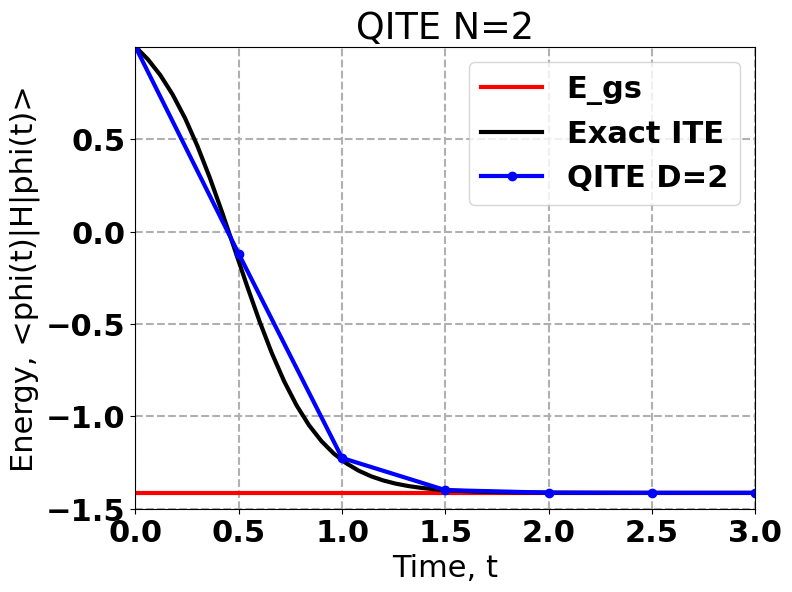

[ 1.         -0.12069998 -1.22545283 -1.39926813 -1.41304127 -1.41410853
 -1.41419671]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Avoid the use of Latex
plt.rcParams.update({
    "text.usetex": False,
})

# Large, bold font
font = {'family': 'sans-serif',
        'weight': 'bold',
        'size': 22}
plt.rc('font', **font)

# Graphic
plt.figure(figsize=(8, 6))
plt.plot(t, np.zeros(N+1)+np.real(Egs), '-r', linewidth=3, label='E_gs')
plt.plot(t_ITE, np.real(EITE), '-k', linewidth=3, label='Exact ITE')
plt.plot(t, np.real(EQ), '-bo', linewidth=3, label=f'QITE D={D}')

plt.xlabel("Time, t")
plt.ylabel("Energy, <phi(t)|H|phi(t)>")
plt.title(f"QITE N={n_qubits}")
plt.xlim(0, (N)*dt)
plt.ylim([-1.5, 1])
plt.yticks(np.arange(-1.5, 1, step=0.5))
plt.legend()
plt.grid(linestyle='--', linewidth=1.5)
plt.show()

print(np.real(EQ))

In [ ]:
Results=np.array([0.976, -0.169, -0.285, -0.454, -0.8545, -0.949, -0.047])

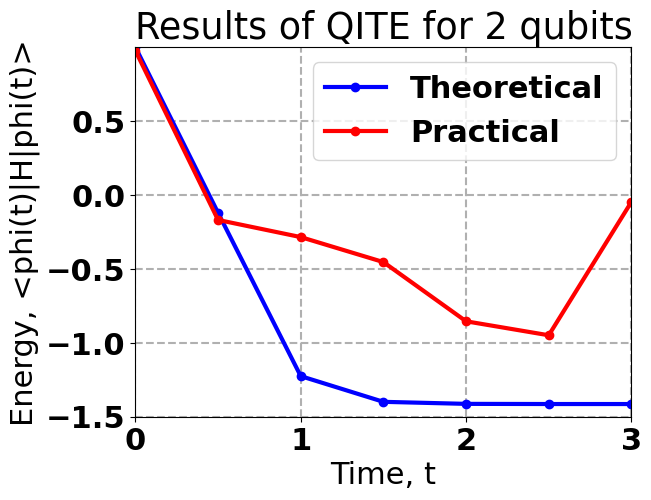

In [ ]:
plt.plot(t, np.real(EQ), '-bo', linewidth=3, label=f'Theoretical')
plt.plot(t,Results, '-ro', linewidth=3, label=f'Practical')
plt.xlabel("Time, t")
plt.ylabel("Energy, <phi(t)|H|phi(t)>")
plt.title(f"Results of QITE for 2 qubits")
plt.xlim(0, (N)*dt)
plt.ylim([-1.5, 1])
plt.yticks(np.arange(-1.5, 1, step=0.5))
plt.legend()
plt.grid(linestyle='--', linewidth=1.5)
plt.show()